Project 2

Question: Which counties should we prioritize for a diabetes prevention intervention?

Since we are supposed to be using regression and prediction, we will probably need to explore our data to see what conclusions we might be able to draw using these tools.

As a first step, let's import the data and packages we need.

Copying Aniket's Dependencies section directly:

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import censusdata
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

Import data:

In [2]:
diabetes = pd.read_csv('/Users/Vena/Desktop/CSS_Project2/Diabetes with Population Info by County 2017.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

In [4]:
diabetes.describe()


,CountyFIPS,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,31393.605280,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,840.862422,90.346894,36.718634,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,16292.078954,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,3534.196512,534.021931,300.672832,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,1001.000000,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,19032.500000,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,30.000000,0.000000,0.000000,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,30024.000000,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,114.000000,9.000000,0.000000,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,46105.500000,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,425.250000,48.000000,6.000000,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,72153.000000,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,82699.000000,14104.000000,10609.000000,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


In [5]:
diabetes.dtypes


County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                      object
Obesity_Number                                                                       object
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

What is the distribution of # of diabetes cases? We need to make a rates:

In [7]:

diabetes['male_over_18']=diabetes['sex and age_total population_18 years and over_male']/diabetes['sex and age_total population_18 years and over']

diabetes['female_over_18']=diabetes['sex and age_total population_18 years and over_female']/diabetes['sex and age_total population_18 years and over']



diabetes = diabetes.apply(pd.to_numeric, errors = 'coerce')
d_rates = diabetes.drop (["CountyFIPS", "race_total population"], axis = 1).div(diabetes['race_total population'], axis = "index")
d_rates.dropna()

d_rates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                0 non-null      float64
 1   State                                                                                                                                                 0 non-null      float64
 2   Diabetes_Number                                                                                                                                       3219 non-null   float6

Make 3 plots:
distribution of diabetes case rates

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


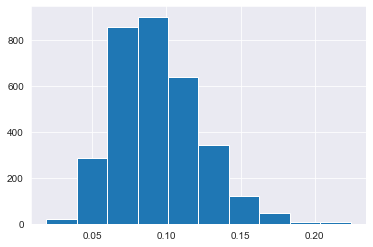

In [8]:
fig, ax = plt.subplots()
ax.hist(d_rates["Diabetes_Number"])
plt.show()

Make plots: diabetes trends by age

proportion of population age 62+ ~ diabetes

Median age * total pop ~ diabetes


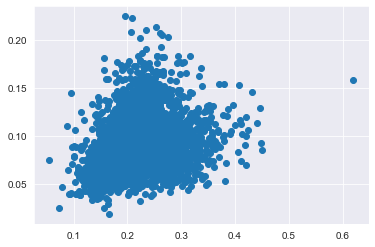

In [9]:
fig, ax = plt.subplots()
ax.scatter(d_rates["sex and age_total population_62 years and over"], d_rates["Diabetes_Number"])
plt.show()

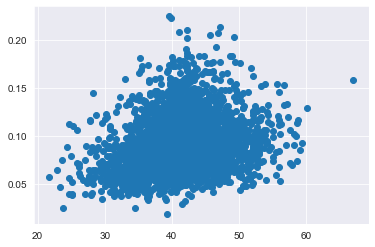

In [10]:
d_rates['median age']=diabetes['sex and age_total population_median age (years)']


fig, ax = plt.subplots()
ax.scatter(d_rates["median age"], d_rates["Diabetes_Number"])
plt.show()

In [11]:
d_rates.cov(min_periods=1)


,County,State,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,...,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,male_over_18,female_over_18,median age
County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diabetes_Number,NaN,NaN,8.126684e-04,6.825952e-04,7.408821e-04,-0.000030,4.071691e-05,-4.071691e-05,4.071691e-05,-1.256475e-03,...,1.711277e-04,2.153571e-05,1.495920e-04,-0.000014,0.000293,1.171953e-04,1.753971e-04,-8.179886e-08,-8.816313e-08,0.034015
Obesity_Number,NaN,NaN,6.825952e-04,1.972074e-03,1.139783e-03,-0.000094,9.232388e-05,-9.232388e-05,9.232388e-05,-1.329715e-03,...,1.027104e-04,6.393803e-05,3.877235e-05,-0.000146,0.000115,3.058603e-05,8.466916e-05,-7.707466e-07,-8.150444e-07,0.020721
Physical_Inactivity_Number,NaN,NaN,7.408821e-04,1.139783e-03,1.992693e-03,0.000026,1.256239e-04,-1.256239e-04,1.256239e-04,-8.773300e-04,...,2.233848e-04,1.183976e-04,1.049872e-04,0.000049,0.000479,1.997577e-04,2.791288e-04,1.886477e-07,1.296407e-07,0.057020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sex and age_total population_65 years and over_male,NaN,NaN,1.171953e-04,3.058603e-05,1.997577e-04,0.000184,6.838285e-05,-6.838285e-05,6.838285e-05,1.460914e-03,...,4.467400e-04,2.362426e-04,2.104974e-04,0.000145,0.001033,5.463811e-04,4.866415e-04,6.625384e-07,5.935480e-07,0.111770
sex and age_total population_65 years and over_female,NaN,NaN,1.753971e-04,8.466916e-05,2.791288e-04,0.000078,8.291963e-05,-8.291963e-05,8.291963e-05,1.156234e-03,...,4.470938e-04,1.316190e-04,3.154749e-04,0.000117,0.001033,4.866415e-04,5.468211e-04,6.148181e-07,6.631539e-07,0.108810
male_over_18,NaN,NaN,-8.179886e-08,-7.707466e-07,1.886477e-07,0.000005,-1.981056e-07,1.981056e-07,-1.981056e-07,8.040476e-07,...,4.659312e-07,8.633956e-07,-3.974645e-07,0.000008,0.000001,6.625384e-07,6.148181e-07,3.564308e-08,3.055930e-08,0.000200
female_over_18,NaN,NaN,-8.816313e-08,-8.150444e-07,1.296407e-07,0.000004,-1.802665e-07,1.802665e-07,-1.802665e-07,7.909643e-07,...,4.062690e-07,5.584323e-07,-1.521633e-07,0.000007,0.000001,5.935480e-07,6.631539e-07,3.055930e-08,2.722581e-08,0.000188


In [ ]:
fig, ax = plt.subplots()
ax.scatter(d_rates["sex and age_total population_20 to 24 years"], d_rates["Diabetes_Number"])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(d_rates["sex and age_total population_25 to 34 years"], d_rates["Diabetes_Number"])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(d_rates["sex and age_total population_35 to 44 years"], d_rates["Diabetes_Number"])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(d_rates["sex and age_total population_45 to 54 years"], d_rates["Diabetes_Number"])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(d_rates["sex and age_total population_55 to 59 years"], d_rates["Diabetes_Number"])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(d_rates["sex and age_total population_60 to 64 years"], d_rates["Diabetes_Number"])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(d_rates["sex and age_total population_65 to 74 years"], d_rates["Diabetes_Number"])
plt.show()

True


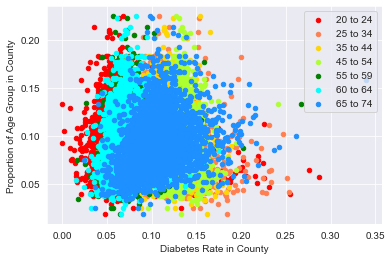

In [12]:

ax1 = d_rates.plot(kind='scatter', x='sex and age_total population_20 to 24 years', y='Diabetes_Number', color='r', label = "20 to 24")
ax2 = d_rates.plot(kind='scatter', x='sex and age_total population_25 to 34 years', y='Diabetes_Number', color='coral', label = "25 to 34", ax=ax1)
ax3 = d_rates.plot(kind='scatter', x='sex and age_total population_35 to 44 years', y='Diabetes_Number', color='gold', label = "35 to 44", ax=ax1)
ax4 = d_rates.plot(kind='scatter', x='sex and age_total population_45 to 54 years', y='Diabetes_Number', color='greenyellow', label = "45 to 54", ax=ax1)
ax5 = d_rates.plot(kind='scatter', x='sex and age_total population_55 to 59 years', y='Diabetes_Number', color='green', label = "55 to 59", ax=ax1)
ax6 = d_rates.plot(kind='scatter', x='sex and age_total population_60 to 64 years', y='Diabetes_Number', color='aqua', label = "60 to 64", ax=ax1)
ax7 = d_rates.plot(kind='scatter', x='sex and age_total population_65 to 74 years', y='Diabetes_Number', color='dodgerblue', label = "65 to 74", ax=ax1)

ax1.set_xlabel("Diabetes Rate in County")
ax1.set_ylabel("Proportion of Age Group in County")
print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6 == ax7)  # True

In [15]:
d_rates['male_18_adj'] = d_rates['male_over_18']*diabetes['race_total population']
d_rates['female_18_adj'] = d_rates['female_over_18']*diabetes['race_total population']

True


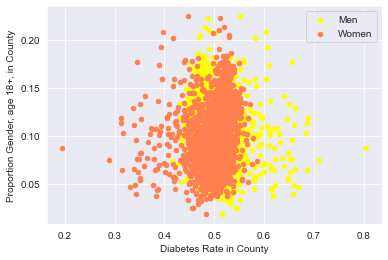

In [16]:

ax1 = d_rates.plot(kind='scatter', x='male_18_adj', y='Diabetes_Number', color='yellow', label = "Men")
ax2 = d_rates.plot(kind='scatter', x='female_18_adj', y='Diabetes_Number', color='coral', label = "Women", ax=ax1)


ax1.set_xlabel("Diabetes Rate in County")
ax1.set_ylabel("Proportion Gender, age 18+, in County")
print(ax1 == ax2 )  # True